In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

from xgboost import XGBClassifier
from sklearn import svm

In [2]:
df = pd.read_csv('../../../high_diamond_ranked_10min.csv')

In [3]:
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [6]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


**Feature Engineering Wardens**

In [7]:
df.loc[df['redDeaths'] ==0] = 1

In [8]:
df.loc[df['blueDeaths'] ==0] =1

In [9]:
df['red_kda'] = round((df['redKills'] + df['redAssists']) / df['redDeaths'], 2)
df.fillna(0, inplace=True)

df['blue_kda'] = round((df['blueKills'] + df['blueAssists']) / df['blueDeaths'], 2)

In [10]:
df['redDeaths'].describe()

count    9879.000000
mean        6.155279
std         3.021717
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        22.000000
Name: redDeaths, dtype: float64

In [11]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,red_kda,blue_kda
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.438589e+09,0.505517,21.988562,2.803826,0.511185,6.155279,6.112866,6.613422,0.556129,0.370888,...,6.844964,17717.221480,214.215305,50.578702,-11.535884,33.244762,21.433829,1628.082174,2.855013,2.837323
std,5.231931e+08,0.499995,18.065805,2.177621,0.499900,3.021717,2.940683,4.070927,0.623056,0.483067,...,0.751269,2397.748257,33.169790,11.545874,2412.341933,1890.344004,3.238635,241.197930,2.922848,2.854489
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,-11467.000000,-8348.000000,1.000000,1.000000,0.080000,0.070000
25%,4.481379e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,6.800000,17175.000000,203.000000,44.000000,-1549.000000,-1179.000000,20.300000,1541.000000,1.245000,1.220000
50%,4.510667e+09,1.000000,16.000000,2.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,7.000000,17956.000000,218.000000,51.000000,1.000000,3.000000,21.800000,1636.000000,2.000000,2.000000
75%,4.521659e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,7.200000,18744.500000,232.000000,57.000000,1545.000000,1261.000000,23.200000,1741.000000,3.400000,3.400000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000,35.000000,40.000000


In [12]:
X = df.drop(columns=['blueWins', 'gameId'])
y = df['blueWins']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns= X_test.columns)
X_test_scaled_df

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,red_kda,blue_kda
0,0.052209,0.08,0.0,0.142857,0.333333,0.103448,1.0,1.0,1.0,0.0,...,0.888889,0.895231,0.822064,0.725275,0.729112,0.590465,0.816176,0.865461,0.090779,0.020285
1,0.056225,0.04,1.0,0.428571,0.190476,0.344828,0.0,0.0,0.0,0.0,...,0.805556,0.792348,0.718861,0.472527,0.411087,0.435390,0.709559,0.685107,0.026346,0.098422
2,0.036145,0.20,0.0,0.714286,0.571429,0.551724,1.0,1.0,1.0,0.0,...,0.833333,0.800207,0.676157,0.560440,0.489797,0.431015,0.665441,0.830957,0.038946,0.059855
3,0.321285,0.20,0.0,0.476190,0.476190,0.482759,0.0,0.0,0.0,0.0,...,0.833333,0.786240,0.708185,0.252747,0.449657,0.417263,0.698529,0.768506,0.054983,0.055096
4,0.068273,0.08,0.0,0.333333,0.571429,0.172414,0.0,0.0,0.0,0.0,...,0.861111,0.861011,0.790036,0.406593,0.651343,0.609558,0.783088,0.841607,0.087056,0.023291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,0.048193,0.00,0.0,0.047619,0.380952,0.137931,0.0,0.0,0.0,0.0,...,0.916667,0.890022,0.918149,0.626374,0.796206,0.738607,0.915441,0.888654,0.241123,0.015026
1972,0.232932,0.04,1.0,0.190476,0.047619,0.103448,0.5,0.0,1.0,0.0,...,0.861111,0.830833,0.911032,0.571429,0.492936,0.443119,0.908088,0.683391,0.014891,0.098422
1973,0.060241,0.20,0.0,0.190476,0.238095,0.137931,0.0,0.0,0.0,0.0,...,0.805556,0.806628,0.637011,0.560440,0.488048,0.437266,0.625000,0.689332,0.083620,0.035813
1974,0.060241,0.12,0.0,0.142857,0.142857,0.206897,0.0,0.0,0.0,0.0,...,0.861111,0.857329,0.829181,0.769231,0.565233,0.539834,0.823529,0.737919,0.047824,0.060856


In [16]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_train_scaled_df

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,red_kda,blue_kda
0,0.060241,0.04,1.0,0.238095,0.333333,0.344828,0.5,1.0,0.0,0.00,...,0.833333,0.839905,0.758007,0.637363,0.652285,0.649222,0.750000,0.812208,0.059851,0.048335
1,0.140562,0.16,1.0,0.000000,0.238095,0.068966,0.0,0.0,0.0,0.00,...,0.805556,0.797018,0.886121,0.472527,0.626138,0.526253,0.882353,0.724628,0.255441,0.010769
2,0.289157,0.12,1.0,0.428571,0.285714,0.344828,0.0,0.0,0.0,0.00,...,0.777778,0.741423,0.775801,0.406593,0.501592,0.460280,0.768382,0.727269,0.043528,0.069872
3,0.048193,0.12,0.0,0.142857,0.285714,0.172414,0.0,0.0,0.0,0.00,...,0.805556,0.781615,0.829181,0.406593,0.550881,0.459882,0.823529,0.722648,0.112257,0.030553
4,0.056225,0.08,1.0,0.142857,0.000000,0.241379,1.0,1.0,1.0,0.00,...,0.805556,0.777708,0.879004,0.483516,0.386465,0.376122,0.875000,0.636388,0.004868,0.273729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,0.080321,0.16,1.0,0.476190,0.380952,0.448276,0.5,1.0,0.0,0.00,...,0.833333,0.813005,0.775801,0.428571,0.413419,0.328731,0.768382,0.747161,0.042096,0.065114
7899,0.044177,0.04,1.0,0.238095,0.333333,0.172414,0.0,0.0,0.0,0.00,...,0.888889,0.868062,0.790036,0.560440,0.532538,0.541084,0.783088,0.746281,0.069301,0.032807
7900,0.096386,0.08,0.0,0.476190,0.190476,0.344828,0.5,0.0,1.0,0.25,...,0.805556,0.768906,0.725979,0.560440,0.386913,0.367826,0.716912,0.705836,0.031501,0.103431
7901,0.060241,0.24,1.0,0.142857,0.190476,0.172414,0.0,0.0,0.0,0.00,...,0.805556,0.803215,0.704626,0.813187,0.537920,0.481475,0.694853,0.714462,0.097938,0.043326


In [17]:
#tree = DecisionTreeClassifier(max_depth = 6, random_state =42)
rf = RandomForestClassifier(n_estimators=400,min_samples_leaf=0.12,random_state=42)
rf.fit(X_train_scaled,y_train)

rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print(rf.score(X_train_scaled, y_train))
print(accuracy_score(y_test, y_pred_rf))

0.7274452739466025
0.7246963562753036


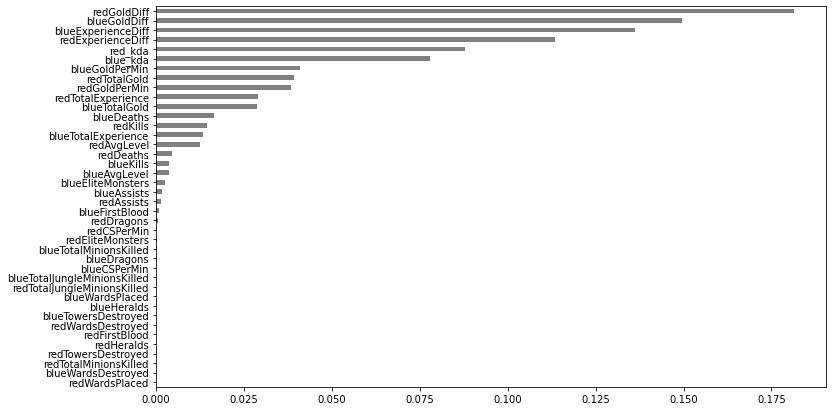

In [18]:
plt.figure(figsize=(12,7))
pd.Series(rf.feature_importances_,index=X.columns).sort_values().plot(kind="barh",color="gray")
plt.show()

In [19]:
important_features = ['red_kda',
 'blue_kda',
 'blueGoldDiff',
 'redGoldDiff',
 'blueExperienceDiff',
 'redExperienceDiff',
 'blueGoldPerMin',
 'blueTotalGold',
 'redGoldPerMin',
 'redTotalGold',
 'redTotalExperience',
 'blueTotalExperience',
 'blueAvgLevel',
 'redKills',
 'blueDeaths',
 'redAvgLevel',
 'blueKills',
 'redDeaths',
 'blueAssists',
 'redAssists',
 'blueEliteMonsters']


In [20]:
X_train_best_features = X_train_scaled_df[important_features]
X_test_best_features = X_test_scaled_df[important_features]
print(X_train_best_features.shape,X_test_best_features.shape)
print(y_train.shape,y_test.shape)

(7903, 21) (1976, 21)
(7903,) (1976,)


In [21]:
tree = DecisionTreeClassifier(max_depth = 6, random_state = 42)
tree.fit(X_train_best_features, y_train)
y_pred_tree = tree.predict(X_test_best_features)
print(tree.score(X_train_best_features,y_train))
print(accuracy_score(y_test,y_pred_tree))

0.7394660255599139
0.7201417004048583


In [22]:
param_grid = {'n_estimators': [50, 75, 100],
                'max_depth': [1, 3, 5, 7, 10],
                'min_samples_leaf': [1, 3, 5, 7]}

In [23]:
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

In [24]:
rf_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(min_samples_leaf=0.12,
                                              n_estimators=400,
                                              random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy')

In [25]:
best_model = rf_gs.best_estimator_

In [26]:
best_model.fit(X_train_scaled, y_train)

   
train_preds = best_model.predict(X_train_scaled)
test_preds = best_model.predict(X_test_scaled)


print('Training accuracy: ', accuracy_score(y_train, train_preds))
print('Validation accuracy: ', accuracy_score(y_test, test_preds))

Training accuracy:  0.7643932683790965
Validation accuracy:  0.7211538461538461


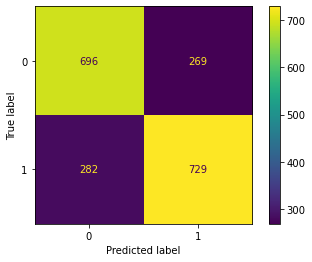

In [27]:
plot_confusion_matrix(best_model, X_test_scaled, y_test)

In [28]:
param_grid = {'n_estimators': [50, 75, 100],
                'max_depth': [1, 3, 5, 7, 10],
                'min_samples_leaf': [1, 3, 5, 7]}

max_depth , min_child_weight and gamma .

In [29]:
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train_scaled, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train_scaled)
test_preds = clf.predict(X_test_scaled)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 95.98%
Validation accuracy: 70.6%


In [30]:
boost_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [ ]:
grid_clf = GridSearchCV(clf, boost_param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

[09:46:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rderekrichesin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


**SVM**

In [ ]:
print(y_train.shape)
print(y_test.shape)

In [ ]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X_train, y_train) for clf in models)

In [ ]:
for model in models:
    train_preds = model.predict(X_train)
    print(train_preds.shape)
    test_preds = model.predict(X_test)
    print(test_preds.shape)
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('test accuracy: ', accuracy_score(y_test, test_preds))
    print()

# Second Part

In [ ]:
data = pd.read_csv('../../../high_diamond_ranked_10min.csv')
data.drop(columns=["gameId"], inplace=True)

data

In [ ]:
data.info()

In [ ]:
data.value_counts("blueWins")

In [ ]:
data["blue_KDA"] = round(((data["blueKills"] + data["blueAssists"]) / data["blueDeaths"]), 2)
data["red_KDA"] = round(((data["redKills"] + data["redAssists"]) / data["redDeaths"]), 2)

In [ ]:
data["blue_KDA"].sort_values()

In [ ]:
data.fillna(0)['blue_KDA'].sort_values()

In [ ]:
data['blue_KDA'][data['blue_KDA'] == np.inf] = 0 
data['red_KDA'][data['red_KDA'] == np.inf] = 0 

In [ ]:
data['blue_KDA'].sort_values()

In [ ]:
data["blue_KDA"] = data.fillna(0) 

data["red_KDA"] = round(((data["redKills"] + data["redAssists"]) / data["redDeaths"]), 2)
data["red_KDA"] = data.fillna(0)

In [ ]:
data["blue_KDA"] = round(((data["blueKills"] + data["blueAssists"]) / data["blueDeaths"]), 2)
#data["blue_KDA"] = data["blue_KDA"].fillna(0) 

data["red_KDA"] = round(((data["redKills"] + data["redAssists"]) / data["redDeaths"]), 2)
#data["red_KDA"] = data["red_KDA"].fillna(0)


In [ ]:
#data.loc[data['redDeaths'] ==0] = round(data["blueKills"] + data["blueAssists"])


#data['blue_KDA'] = data[['blueAssists','blueKills']].sum(axis=1).where(data['blueDeaths'] == np.inf, 0)

In [ ]:
for idx, x in enumerate(data['blue_KDA']):
    print(idx,x)
    print('type: ', type(x))
    print()
    if np.isinf(x):
        data['blue_KDA'][idx] = round(data["blueKills"][idx] + data["blueAssists"][idx])

In [ ]:
for idx, x in enumerate(data['red_KDA']):
    print(idx,x)

In [ ]:

for idx, x in enumerate(data['red_KDA']):
    print(idx,x)
    if np.isinf(x):
        data['red_KDA'][idx] = round(data["redKills"][idx] + data["redAssists"][idx])

    

In [ ]:
data.describe()

In [ ]:
data

In [ ]:
data.describe()

In [ ]:
#data.loc[data['red_KDA'] == np.inf]

In [ ]:
#data.loc[data['red_KDA'] == np.inf] = round(data["redKills"] + data["redAssists"])

In [ ]:
data.loc[:,['blueKills', 'blueAssists', 'blueDeaths']].head(9)

In [ ]:
#data.drop(72, inplace=True)

In [ ]:
data['blue_KDA'].value_counts().to_string()

In [ ]:
fig, ax = plt.subplots()
ax.bar(data['blue_KDA'].unique(),data['blue_KDA'].value_counts())

In [ ]:
data.describe()

In [ ]:
#3217

In [ ]:
pd.DataFrame(data["red_KDA"], columns=['red_KDA']).sample(n=15)

In [ ]:
y = data["blueWins"]

X = data.drop("blueWins",axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rf = RandomForestClassifier(n_estimators=400,min_samples_leaf=0.12,random_state=42)
rf.fit(X_train,y_train)

In [ ]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values().plot(kind="barh",color="gray")
plt.show()

feature_importances = pd.DataFrame(rf.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
most_important_features = list(feature_importances.index[:24])
most_important_features

In [ ]:
X_train = X_train[most_important_features]
X_test = X_test[most_important_features]
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,30)
scores = list()
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_train,y_train))
plt.plot(k_range,scores,marker="o")
plt.ylabel("acurracy")
plt.xlabel("N#_neighbors")
plt.show()

knn =  KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(max_depth = 6, random_state = 42)
d_tree.fit(X_train, y_train)
y_pred_dtree = d_tree.predict(X_test)
print(d_tree.score(X_train, y_train))
print(accuracy_score(y_test, y_pred_dtree))


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_dtree))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dtree).ravel()
print("acurracy :", accuracy_score(y_test, y_pred_dtree)) #(tp+tn)/(tp+tn+fp+fn))
print("precision :",tp/(tp+fn))


In [ ]:
predictions = pd.DataFrame(y_pred_dtree,columns=["BlueWins"])
predictions

In [ ]:
ax = sns.catplot(x="BlueWins",data=predictions,palette=["r","b"],kind="count")
plt.ylabel("Total victories")
plt.xlabel("Red_Team = 0              Blue_Team = 1")
plt.title("Total Victories per Team")
plt.show()

predictions.value_counts("BlueWins")